In [ ]:
# QUÁ TRÌNH EDA =
#Bước 1: Xử lý dữ liệu cơ bản theo yêu cầu
1.1 Đọc dữ liệu
1.2 Loại bỏ dòng dữ liệu rỗng
1.3 Loại bỏ dữ liệu trùng, biết rằng dữ liệu trùng là dữ liệu có đồng thời ORDERNUMBER và ORDERDATE như nhau
1.4 Kiểm tra các dữ liệu thiếu và điền thiếu bằng chart
    1.4.1 Với dữ liệu định tính thì thay bằng Unknown
    1.4.2 Với dữ liệu định lượng thì thay bằng giá trị trung bình, nếu là dữ liệu time series thì dùng interpolate
1.5 Tách cột FULLNAME thành CONTACTLASTNAME và CONTACTFIRSTNAME, sau đó xóa cột FULLNAME
1.6 Lưu dữ liệu đã xử lý thành file với tên processed_sales_data với header là tên cột và phân cách (delimiter) là dấu phẩy

Bước 2: Công ty cần phân tích dữ liệu bán hàng.
Hãy thực hiện EDA cho dữ liệu để khai thác các thông tin về dữ liệu SALES trên nhiều góc độ
Yêu cầu
1. Dữ liệu định tính
1.1 Một biến
    1.1.1 Hãy cho biết số lượng đơn hàng theo năm (YEAR_ID)
        (*) Gợi ý: Trực quan với biểu đồ cột (bar)
    1.1.1.bis Hãy cho biết số lượng sản phẩm bán theo năm (YEAR_ID)  
    1.1.2 Hãy cho biết tỉ lệ số đơn hàng theo DEALSIZE
        (*) Gợi ý: Trực quan với biểu đồ tròn (pie)
    1.1.3 Hãy cho biết tỉ lệ giá trị SALES theo DEALSIZE
    1.1.4 Hãy cho biết tỉ lệ tình trạng đơn hàng (STATUS)
    1.1.5 Hãy cho biết tỉ lệ số đơn hàng theo COUNTRY
    1.1.6 Hãy cho biết tỉ lệ số đơn hàng theo CITY    
    1.1.7 Hãy cho biết tổng giá trị SALES theo ngày
        (*) Gợi ý: Biểu đồ line (Ox = date, Oy = tổng giá trị SALES)
    1.1.8 Hãy cho biết giá trị SALES trung bình theo tháng năm
    1.1.9 Hãy cho biết số lượng hóa đơn theo (tháng, năm)
        (*) Gợi ý: Biểu đồ line (Ox = {tháng, năm}, Oy = số lượng hóa đơn)
    1.1.10 Hãy cho biết số lượng hóa đơn theo (quý, năm)
        (*) Gợi ý: Biểu đồ line (Ox = {quý, năm}, Oy = số lượng hóa đơn)
1.2 Đa biến
(*) Gợi ý: Dùng biểu đồ cột so sánh
    1.2.1 Hãy cho biết trạng thái số đơn hàng (STATUS) theo nhóm các năm (YEAR_ID)
        (*) Gợi ý: Biểu đồ so sánh un-stacked (vertical)
    1.2.2  Hãy cho biết số lượng đơn hàng theo nhóm các quý (QTR_ID) theo năm (YEAR_ID)
        (*) Gợi ý: Biểu đồ so sánh un-stacked (vertical)  
    1.2.3 Hãy cho biết số lượng hóa đơn giữa các nhóm DEALSIZE theo YEAR_ID
        (*) Gợi ý: Biều đồ so sánh stacked (horizontal)
    1.2.4 Hãy cho biết trung bình SALES các nhóm STATUS theo DEALSIZE
    1.2.5 Hãy cho biết tổng số lượng sản phẩm các nhóm DEALSIZE theo vùng kinh tế (TERRITORY)

In [16]:
import pandas as pd
df = pd.read_csv('my_sales_data.csv', encoding='unicode_escape', header=0, delimiter=',')

In [17]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,FULLNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,DaCunha Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown Julie,Medium


In [3]:
#1.2 Loại bỏ dòng dữ liệu rỗng
df.dropna(how='all',inplace=True)

In [18]:
#1.3 Loại bỏ dữ liệu trùng, biết rằng dữ liệu trùng là dữ liệu có đồng thời ORDERNUMBER và ORDERDATE như nhau
df.drop_duplicates(inplace=True) # định nghĩ trên 2 cột bị trùng
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,FULLNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,DaCunha Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet Annette,Small


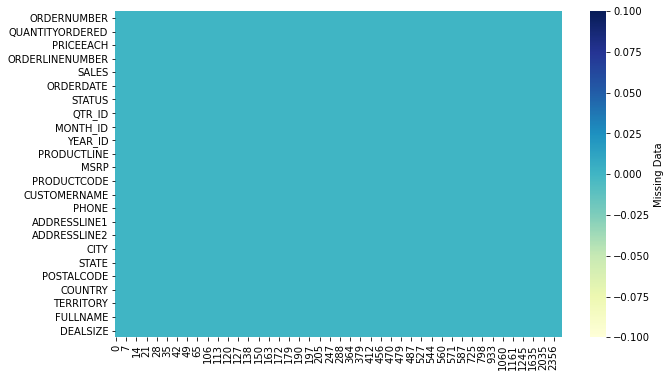

In [11]:
#1.4 Kiểm tra các dữ liệu thiếu và điền thiếu bằng chart
   # 1.4.1 Với dữ liệu định tính thì thay bằng Unknown
   # 1.4.2 Với dữ liệu định lượng thì thay bằng giá trị trung bình, nếu là dữ liệu time series thì dùng interpolate
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label':'Missing Data'})

plt.savefig('my_missing_data.png', dpi=100)

In [7]:
#1.4dien thieu
df['ADDRESSLINE2'].fillna('Unknown', inplace=True)
df['TERRITORY'].fillna('Unknown', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)
df['POSTALCODE'].fillna('0', inplace=True)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,FULLNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,DaCunha Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Young Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,Unknown,San Francisco,CA,0,USA,Unknown,Brown Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,10199,29,38.40,1,1113.60,12/1/2003 0:00,Shipped,4,12,2003,...,3105553722,3675 Furth Circle,Unknown,Burbank,CA,94019,USA,Unknown,Thompson Steve,Small
2532,10397,32,80.55,5,2577.60,3/28/2005 0:00,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Unknown,Toulouse,Unknown,31000,France,EMEA,Roulet Annette,Small
2554,10352,23,100.00,3,2352.67,12/3/2004 0:00,Shipped,4,12,2004,...,6175558428,16780 Pompton St.,Unknown,Brickhaven,MA,58339,USA,Unknown,Taylor Leslie,Small
2692,10118,36,100.00,1,4219.20,4/21/2003 0:00,Shipped,2,4,2003,...,(93) 203 4555,"Rambla de Catalu¤a, 23",Unknown,Barcelona,Unknown,8022,Spain,EMEA,Saavedra Eduardo,Medium


In [13]:
#1.5
df[['CONTACTLASTNAME','CONTACTFIRSTNAME']] = df['FULLNAME'].str.split(' ', expand=True)
df = df.drop('FULLNAME', axis=1)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE,CONTACTLASTNAME,CONTACTFIRSTNAME
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Small,Yu,Kwai
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Small,Henriot,Paul
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Medium,DaCunha,Daniel
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Medium,Young,Julie
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,Unknown,San Francisco,CA,0,USA,Unknown,Medium,Brown,Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,10199,29,38.40,1,1113.60,12/1/2003 0:00,Shipped,4,12,2003,...,3675 Furth Circle,Unknown,Burbank,CA,94019,USA,Unknown,Small,Thompson,Steve
2532,10397,32,80.55,5,2577.60,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,Unknown,Toulouse,Unknown,31000,France,EMEA,Small,Roulet,Annette
2554,10352,23,100.00,3,2352.67,12/3/2004 0:00,Shipped,4,12,2004,...,16780 Pompton St.,Unknown,Brickhaven,MA,58339,USA,Unknown,Small,Taylor,Leslie
2692,10118,36,100.00,1,4219.20,4/21/2003 0:00,Shipped,2,4,2003,...,"Rambla de Catalu¤a, 23",Unknown,Barcelona,Unknown,8022,Spain,EMEA,Medium,Saavedra,Eduardo


In [14]:
#1.6 Lưu dữ liệu đã xử lý thành file với tên processed_sales_data với header là tên cột và phân cách (delimiter) là dấu phẩy
df.to_csv('processed_sales_data.csv', sep =',', encoding='utf-8', index=False)

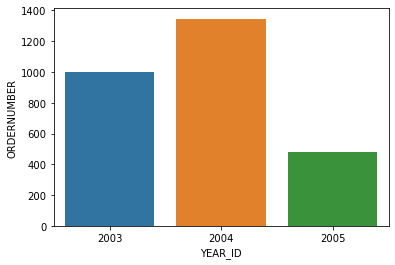

In [19]:
# buoc 2: EDA
#1.1.1 Hãy cho biết số lượng đơn hàng theo năm (YEAR_ID)
from numpy  import count_nonzero
sns.barplot(x='YEAR_ID', y='ORDERNUMBER', data=df, ci=None, estimator=count_nonzero)
plt.show()


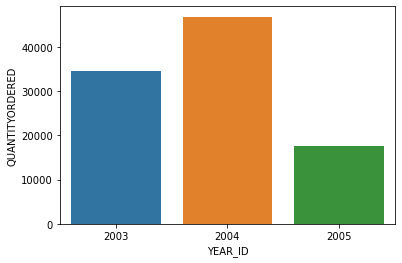

In [20]:
#1.1.1.bis Hãy cho biết số lượng sản phẩm bán theo năm (YEAR_ID)
from numpy  import sum
sns.barplot(x='YEAR_ID', y='QUANTITYORDERED', data=df, ci=None, estimator=sum)
plt.show()

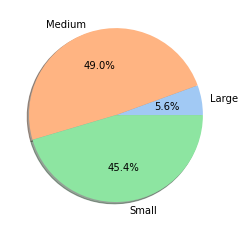

In [23]:
#1.1.2 Hãy cho biết tỉ lệ số đơn hàng theo DEALSIZE
# (*) Gợi ý: Trực quan với biểu đồ tròn (pie)
gb = df.groupby(['DEALSIZE'])['ORDERNUMBER'].agg(['count'])
#gb
data = list(gb['count'])
labels = gb.index

colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

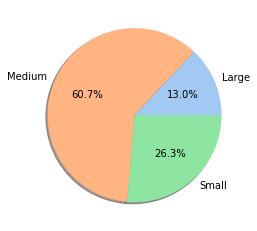

In [24]:
# 1.1.3 Hãy cho biết tỉ lệ giá trị SALES theo DEALSIZE
gb = df.groupby(['DEALSIZE'])['SALES'].agg(['sum'])
#gb
data = list(gb['sum'])
labels = gb.index

colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

In [25]:
# 1.1.4 Hãy cho biết tỉ lệ tình trạng đơn hàng (STATUS)
gb = df.groupby(['STATUS']).agg(['sum'])
gb

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,FULLNAME,DEALSIZE
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
STATUS,,,,,,,,,,,,,,,,,,,
Cancelled,613878,2038,5061.69,482,194487.48,10/23/2003 0:005/7/2004 0:006/1/2004 0:006/1/2...,152,410,120224,Classic CarsClassic CarsClassic CarsClassic Ca...,5759,S10_4757S10_4757S12_1099S12_3380S12_3990S12_46...,Scandinavian Gift IdeasLand of Toys Inc.UK Col...,0695-34 65552125557818(171) 555-2282(171) 555-...,?kergatan 24897 Long Airport AvenueBerkeley Ga...,BorasNYCLiverpoolLiverpoolLiverpoolLiverpoolLi...,SwedenUSAUKUKUKUKUKUKSwedenSpainUKUKUKSwedenUS...,Larsson MariaYu KwaiDevon ElizabethDevon Eliza...,MediumSmallMediumSmallSmallMediumMediumMediumM...
Disputed,145795,597,1252.26,42,72212.86,5/13/2005 0:005/13/2005 0:005/13/2005 0:005/13...,28,67,28070,MotorcyclesMotorcyclesMotorcyclesMotorcyclesCl...,1529,S10_1678S10_2016S10_4698S12_2823S18_1129S18_19...,Euro Shopping ChannelEuro Shopping ChannelEuro...,(91) 555 94 44(91) 555 94 44(91) 555 94 44(91)...,"C/ Moralzarzal, 86C/ Moralzarzal, 86C/ Moralza...",MadridMadridMadridMadridKobenhavnKobenhavnMadr...,SpainSpainSpainSpainDenmarkDenmarkSpainDenmark...,Freyre DiegoFreyre DiegoFreyre DiegoFreyre Die...,LargeMediumLargeMediumLargeLargeSmallLargeMedi...
In Process,427330,1490,3251.96,224,144729.96,5/31/2005 0:005/31/2005 0:005/31/2005 0:005/31...,82,205,82205,Classic CarsClassic CarsTrucks and BusesTrucks...,4011,S10_1949S10_4962S12_1666S12_4473S18_1097S18_13...,Euro Shopping ChannelLa Rochelle GiftsEuro Sho...,(91) 555 94 4440.67.8555(91) 555 94 4440.67.85...,"C/ Moralzarzal, 8667, rue des Cinquante Otages...",MadridNantesMadridNantesMadridAllentownAllento...,SpainFranceSpainFranceSpainUSAUSAAustraliaFran...,Freyre DiegoLabrune JanineFreyre DiegoLabrune ...,LargeMediumLargeMediumLargeMediumSmallMediumMe...
On Hold,457496,1879,3773.99,282,178979.19,5/6/2005 0:0011/19/2004 0:004/22/2005 0:004/22...,100,232,88214,Classic CarsClassic CarsClassic CarsVintage Ca...,4237,S10_4757S10_4962S18_1589S18_1749S18_2248S18_23...,"Gifts4AllAges.comVolvo Model Replicas, CoThe S...",61755595550921-12 3555408555365940855536594085...,8616 Spinnaker Dr.Berguvsvgen 83086 Ingle Ln...,BostonLuleSan JoseSan JoseSan JoseLuleLuleNewa...,USASwedenUSAUSAUSASwedenSwedenUSAUSAUSAUSASwed...,Yoshido JuriBerglund ChristinaFrick SueFrick S...,SmallMediumLargeLargeMediumMediumSmallMediumMe...
Resolved,485647,1660,3753.24,334,150718.28,10/21/2003 0:0010/21/2003 0:0010/21/2003 0:001...,95,235,94211,Classic CarsTrucks and BusesTrucks and BusesCl...,4290,S10_4962S12_1666S18_1097S18_1589S18_1662S18_16...,Mini Auto WerkeMini Auto WerkeMini Auto WerkeT...,7675-35557675-35557675-3555626555726531 12 355...,Kirchgasse 6Kirchgasse 6Kirchgasse 678934 Hill...,GrazGrazGrazPasadenaKobenhavnMadridPasadenaPas...,AustriaAustriaAustriaUSADenmarkSpainUSAUSAUSAD...,Mendel RolandMendel RolandMendel RolandYoung J...,MediumMediumMediumSmallSmallSmallMediumLargeMe...
Shipped,26830235,91403,219074.93,16890,9291501.08,2/24/2003 0:005/7/2003 0:007/1/2003 0:008/25/2...,7215,18873,5243846,MotorcyclesMotorcyclesMotorcyclesMotorcyclesMo...,264494,S10_1678S10_1678S10_1678S10_1678S10_1678S10_16...,Land of Toys Inc.Reims CollectablesLyon Souven...,212555781826.47.1555+33 1 46 62 75556265557265...,897 Long Airport Avenue59 rue de l'Abbaye27 ru...,NYCReimsParisPasadenaSan FranciscoBurlingameLi...,USAFranceFranceUSAUSAUSAFranceNorwayUSAFranceA...,Yu KwaiHenriot PaulDaCunha DanielYoung JulieBr...,SmallSmallMediumMediumMediumMediumSmallMediumS...


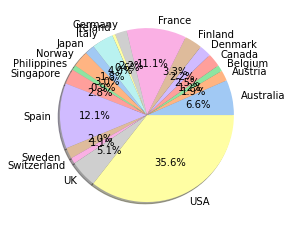

In [33]:
# 1.1.5 Hãy cho biết tỉ lệ số đơn hàng theo COUNTRY
gb = df.groupby(['COUNTRY'])['ORDERNUMBER'].agg(['count'])
#gb
data = list(gb['count'])
labels = gb.index

colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

In [32]:
#   1.1.6 Hãy cho biết tỉ lệ số đơn hàng theo CITY 
gb = df.groupby(['CITY'])['ORDERNUMBER'].agg(['count'])
gb


,count
CITY,
Aaarhus,27
Allentown,31
Barcelona,23
Bergamo,48
Bergen,29
...,...
Toulouse,20
Tsawassen,26
Vancouver,22


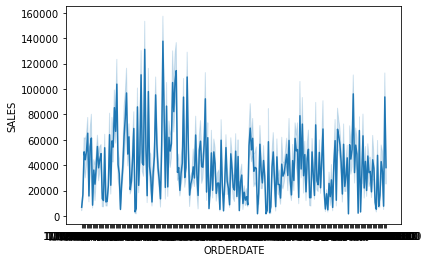

In [34]:
#1.7 Hãy cho biết tổng giá trị SALES theo ngày
sns.lineplot(x='ORDERDATE', y='SALES', data = df, estimator=sum)
plt.show()

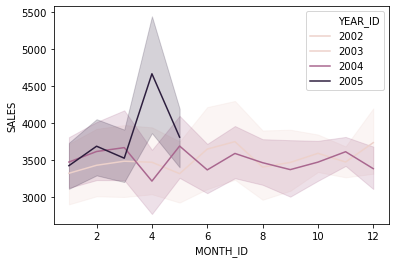

In [39]:
#
sns.lineplot(x='MONTH_ID', y='SALES', data = df, hue='YEAR_ID')
plt.show()

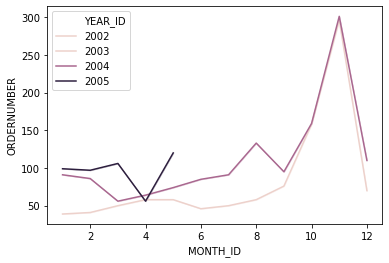

In [43]:
#1.1.9 Hãy cho biết số lượng hóa đơn theo (tháng, năm)
sns.lineplot(x='MONTH_ID', y='ORDERNUMBER', estimator=count_nonzero, data = df, hue='YEAR_ID')
plt.show()

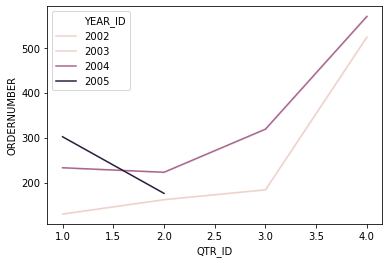

In [44]:
# 1.1.10 Hãy cho biết số lượng hóa đơn theo (quý, năm)
sns.lineplot(x='QTR_ID', y='ORDERNUMBER', estimator=count_nonzero, data = df, hue='YEAR_ID')
plt.show()

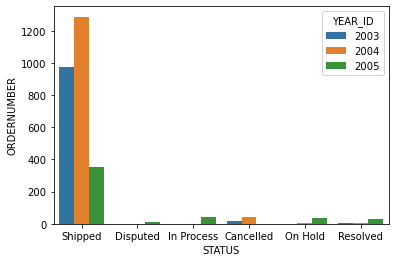

In [45]:
#1.2 Đa biến
#(*) Gợi ý: Dùng biểu đồ cột so sánh
    #1.2.1 Hãy cho biết trạng thái số đơn hàng (STATUS) theo nhóm các năm (YEAR_ID)
       # (*) Gợi ý: Biểu đồ so sánh un-stacked (vertical)
sns.barplot(x='STATUS', y='ORDERNUMBER', hue='YEAR_ID', data=df, ci=None, estimator=count_nonzero)

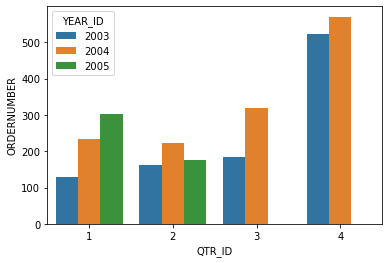

In [48]:
# 1.2.2  Hãy cho biết số lượng đơn hàng theo nhóm các quý (QTR_ID) theo năm (YEAR_ID)
sns.barplot(x='QTR_ID', y='ORDERNUMBER',hue='YEAR_ID', data=df, ci=None, estimator=count_nonzero)

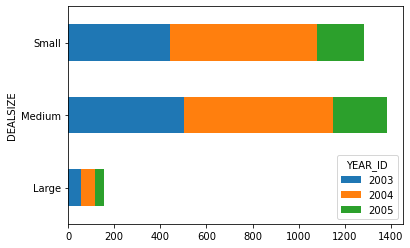

In [52]:
#1.2.3
gb = df.groupby(['DEALSIZE','YEAR_ID'])['ORDERNUMBER'].count().unstack()
gb.plot(kind='barh', stacked=True)
plt.show()

In [ ]:
# 1.2.4 Hãy cho biết trung bình SALES các nhóm STATUS theo DEALSIZE
gb = df.groupby(['DEALSIZE','YEAR_ID'])['ORDERNUMBER'].count().unstack()
gb.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
2. Dữ liệu định lượng
2.1 Một biến
    2.1.1 Mô tả dữ liệu của QUANTITYORDERED, PRICEEACH, SALES
    2.1.2 Phân phối (PairPlot, Histogram) của QUANTITYORDERED, PRICEEACH, SALES
        2.1.2.1 Phân phối (PairPlot, Histogram) của QUANTITYORDERED, PRICEEACH, SALES theo nhóm DEALSIZE
    2.1.3 Biểu diễn (Boxplot) của QUANTITYORDERED, PRICEEACH, SALES
        2.1.3.1 Biểu diễn (Boxplot) của QUANTITYORDERED theo nhóm DEALSIZE
        2.1.3.2 Biểu diễn (Boxplot) của PRICEEACH theo nhóm DEALSIZE
        2.1.3.3 Biểu diễn (Boxplot) của SALES theo nhóm DEALSIZE
    2.1.4 Độ xiên của phân phối (Skew) của QUANTITYORDERED, PRICEEACH, SALES
    2.1.5 Độ nhọn của phân phối (Kutorsis) của QUANTITYORDERED, PRICEEACH, SALES
    2.1.6 Kiểm tra tính chuẩn (Normal distribution) của QUANTITYORDERED, PRICEEACH, SALES